<h2>Passos Iniciais:</h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Carregando os dados:

In [114]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Se observarmos o conjunto de dados, existem valores numéricos e colunas com valores como 'Sim' ou 'Não'. Mas para ajustar uma linha de regressão, precisamos de valores numéricos, então converteremos 'Sim' e 'Não' como 1s e 0s.

In [115]:
housing = housing.replace({'yes':1,'no':0})
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


A coluna de status de mobiliário possui três níveis mobiliado, semimobiliado e não mobiliado. Para resolver o problema, usaremos uma técnica conhecida como codificação one-hot.

In [116]:
housing = pd.get_dummies(housing, columns=['furnishingstatus'], dtype=int)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


<h2>Contruindo o modelo</h2>

Dividindo conjunto de treinamento (70%) e teste (30%)

In [117]:
from sklearn.model_selection import train_test_split

x_val = housing.drop(['price'], axis=1).values
y_val = housing['price']

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

Normalizando os dados e treinando o modelo:

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# normalização
pipe = Pipeline([('scaler', StandardScaler())])
x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

# regressão (treinamento)
my_model = LinearRegression()
my_model.fit(x_train, y_train)
print("R2 (test) =", my_model.score(x_test, y_test)) # r2 squared

#regressão (teste)
test_pred = my_model.predict(x_test)
train_pred = my_model.predict(x_train)

R2 (test) = 0.6462289796718517


<h2>Prevendo dados desconhecidos</h2>

Função para impressão de métricas de desempenho

In [123]:
from sklearn import metrics

def print_evaluate(real, predicted):
    mae = metrics.mean_absolute_error(real, predicted)
    mape = metrics.mean_absolute_percentage_error(real, predicted)
    mse = metrics.mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(real, predicted)
    
    print("MAE:", mae)
    print("MAPE:", mape)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Square:", r2_square)

Impressão dos resultados:

In [124]:
print("Métricas de Desempenho:")
print("\nDados de teste:")
print_evaluate(y_test, test_pred)

print("\nDados de treinamento:")
print_evaluate(y_train, train_pred)

Métricas de Desempenho:

Dados de teste:
MAE: 921414.1549563629
MAPE: 0.21259086718787634
MSE: 1525857969796.9597
RMSE: 1235256.2364938539
R2 Square: 0.6456759512352666

Dados de treinamento:
MAE: 720704.0084935162
MAPE: 0.15820309029843352
MSE: 963761963136.5963
RMSE: 981713.7888084267
R2 Square: 0.6932223501663739


É possível verificar que o valor do R2 para dados de treinamento é ligeiramente superior ao do conjunto de teste (69 x 65%). O mesmo ocorre para os outros índices. Isso pode indicar que o sistema está levemente "overfitted".

<h2>Comparação Gráfica de resultado</h2>
Comparação de previsto e real:

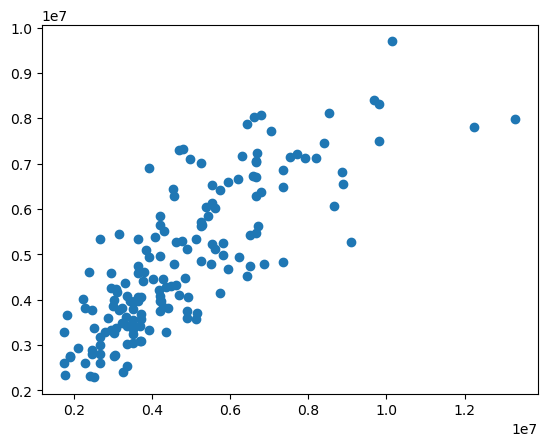

In [125]:
plt.scatter(x=y_test, y=test_pred)